Imports

In [56]:
import pandas as pd                #library for load data and work with it easily
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec  import GridSpec
import numpy as np

import logging

In [57]:
class Data:

    def __init__(self):
        self.Usage = "prepare or load data inot structres"
        self.data_frames = {}

    #this module load datas into data frames pandas and returns it
    def load_into_DFrames(self,data_list):
        for data_name in data_list:
            if data_list[data_name] == 'xlsx':
                self.data_frames[data_name] = pd.read_excel(data_name+'.'+data_list[data_name])
            elif data_list[data_name] == 'csv':
                self.data_frames[data_name] = pd.read_csv(data_name+'.'+data_list[data_name])        
        return self.data_frames

    #this module remove multiple data frames from df_list ,usage for free up memory
    def remove_from_DFrames(self,data_list):
        for data_name in data_list:
            self.data_frames.pop(data_name)

    # this module plot boxplot for given attrs from data frame
    def boxPlot(self,dataFrame,df_name,attrs,figsize=(10,10)):
        height_layout = int(len(attrs)*3)                               #height for each attribute in one row       
        fig = plt.figure(constrained_layout=True,figsize=figsize)       #create figure with specific size
        gs = GridSpec(height_layout,2,figure=fig,wspace=0.025,hspace=0.05)                       #create gridspec for flexible layout in figure          
        # iterate over each attribute and plots its boxplot and a table that contains important statical indexes
        for i in range(0,len(attrs)):
            pos_in_table = int(i*2)
            #table
            min_value,q1,mean,q3,max_value = dataFrame[attrs[i]].quantile([0,0.25,0.5,0.75,1])
            ax11 = fig.add_subplot(gs[pos_in_table:pos_in_table+2,1])                     #create a subplot for table with favourite  
            ax11.set_axis_off()                                            #remove axis of table subplot
            # create data of table with two columns and 9 rows
            data = [
                ['attribute',attrs[i]],
                ['type',''],
                ['range',str(min_value)+'-\n'+str(max_value)],
                ['min',min_value],
                ['max',max_value],
                ['mean',mean],
                ['mode',dataFrame[attrs[i]].mode()[0:min(3,len(dataFrame[attrs[i]].mode())) ].to_string()],
                ['median',dataFrame[attrs[i]].median()],
                ['outliers','']
            ]
            t1 = ax11.table(cellText=data,loc='center')
            t1.scale(1,3)                                                  #scale the table with your own choice

            #boxplot
            ax1_top = fig.add_subplot(gs[pos_in_table,0])       #create a subplot for boxplot with favourite size
            ax1_top.boxplot(dataFrame[attrs[i]], patch_artist=True)            # boxplot for specific attribute
            ax1_down = fig.add_subplot(gs[pos_in_table+1,0])       #create a subplot for boxplot with favourite size
            ax1_down.boxplot(dataFrame[attrs[i]], patch_artist=True)            # boxplot for specific attribute
            ax1_top.set_ylim(q3+(2*(q3-q1)),1.2*max_value)
            ax1_down.set_ylim(min(0,min_value-q1),q3+(2*(q3-q1)))
            ax1_top.spines['bottom'].set_visible(False)
            ax1_down.spines['top'].set_visible(False)

            d = .015  # how big to make the diagonal lines in axes coordinates
            # arguments to pass to plot, just so we don't keep repeating them
            kwargs = dict(transform=ax1_top.transAxes, color='k', clip_on=False)
            ax1_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
            ax1_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

            kwargs.update(transform=ax1_down.transAxes)  # switch to the bottom axes
            ax1_down.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
            ax1_down.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
        gs.update(wspace=0,hspace=0)
        fig.savefig(df_name+'/'+str(attrs))
        plt.show()





In [58]:
def box_plot_table(df_name,attributes):
    for attr in attributes:
        data.boxPlot(data_frames[df_name],df_name,[attr])


# understanding the data and and performing some statistics

### PRODUCT TABLE

#### read product dataset

In [59]:
data = Data()
data_frames = data.load_into_DFrames({'product':'xlsx'})
data_frames['product'].head(3)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لومانا ، ماگ لومانا ، lomana ، lomana mug ، ئشل ، سرامیک ، ماگ سرامیکی ، لیوان سرامیک,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":""جنس"",""Value"":""سرامیک""},{""Key"":""ابعاد بسته‌بندی"",""Value"":""13 × 12 × 9""},{""Key"":""ابعاد"",""Value"":""8 × 10""},{""Key"":""در""},{""Key"":""تعداد"",""Value"":""یک عدد""}..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه تهران، Basin, Tehran hg, Perani، آبکش، سرویس آبکش، آبکش و کاسه، پلاستیکی",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع"",""Value"":""ست آبکش و آبگیر""},{""Key"":""سایر توضیحات"",""Value"":""- دارای آبکش به قطر 24 و احتساب دسته 27 و ارتفاع 9 سانتی متر به وزن 119 گرم\r\n- دارای کاس..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 میلی لیتر,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-میلی-لیتر,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره"",""Value"":""حاوی روغن هسته انگور ارگانیک، روغن آرگان، روغن کنجد و شی باتر""},{""Key"":""عصاره"",""Value"":""دارد""},{""Key"":""ویژگی"",""Value"":""ضد چروک""},{""Key"":""ویت..."


###### id

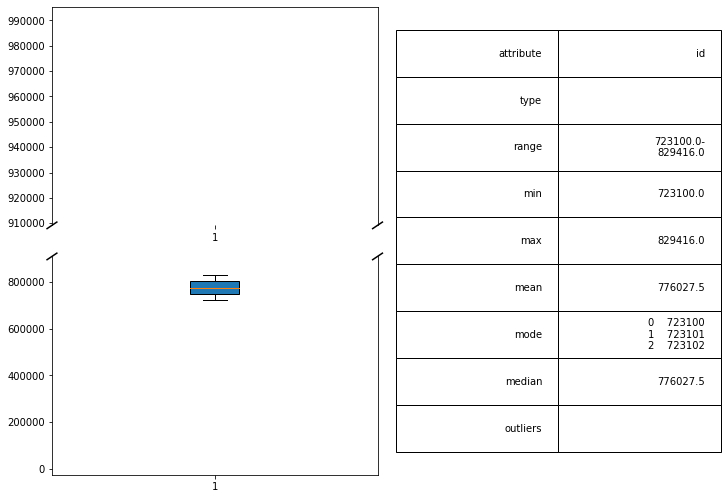

In [60]:
attributes = ['id']
box_plot_table('product',attributes)

###### title_fa

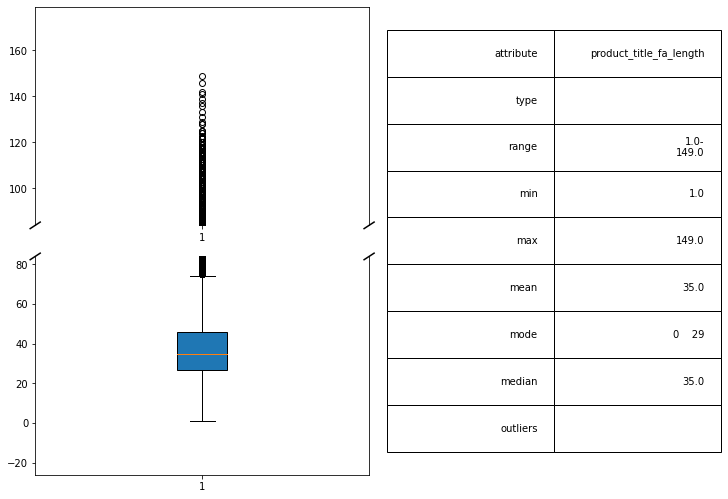

In [61]:
products = data.data_frames['product']
products['product_title_fa_length'] = products['product_title_fa'].str.len()
attributes = ['product_title_fa_length']
box_plot_table('product',attributes)

In [63]:
pd.options.display.max_colwidth = 200
null_values_product_title_fa = products[(products['product_title_fa']=="NaN") ]     # missing values
not_valid_product_title_fa = products[ (products['product_title_fa_length']<=3) ]   # not valid values
not_correct_product_title_fa = products[ (products['product_title_fa_length']<=10) & (products['product_title_fa'].str.split().str.len() <= 1) ]    #not correct values
print("there are {} values for product title fa that are not valid vlues ".format(len(not_valid_product_title_fa)))
print("there are {} values for product title fa that are not corrcet ".format(len(not_correct_product_title_fa)))
print("percentage of not correct for product title fa : {}".format(len(not_correct_product_title_fa)/len(products)))   #calculate precentage of not correct
print("percentage of not valid for product title fa : {}".format(len(not_valid_product_title_fa)/len(products)))       #calculate precentage of not valid
# logging the previous data that is printed
logging.basicConfig(filename='product/info.log', level=logging.DEBUG)
logging.info("there are {} values for product title fa that are not valid vlues ".format(len(not_valid_product_title_fa)))
logging.info("there are {} values for product title fa that are not corrcet ".format(len(not_correct_product_title_fa)))
logging.info("percentage of not correct for product title fa : {}".format(len(not_correct_product_title_fa)/len(products)))
logging.info("percentage of not valid for product title fa : {}".format(len(not_valid_product_title_fa)/len(products)))
not_valid_product_title_fa.head(5)

there are 27 values for product title fa that are not valid vlues 
there are 115 values for product title fa that are not corrcet 
percentage of not correct for product title fa : 0.00115
percentage of not valid for product title fa : 0.00027


,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,product_title_fa_length
4578,738970,جع\,NaN,جع,جعبه،کمک اولیه،,جعبه کمک‌های اولیه,جعبه کمک‌های اولیه First-Aid-Kit,متفرقه,Miscellaneous,NaN,3
8222,815867,11,NaN,11,NaN,دفتر,دفتر Notebook,متفرقه,Miscellaneous,NaN,2
8362,781592,.,.,NaN,.,گروه کالاهای اشتباه,NaN,متفرقه,Miscellaneous,NaN,1
9184,785160,.,.,NaN,.,گروه کالاهای اشتباه,NaN,متفرقه,Miscellaneous,NaN,1
16601,781585,.,.,NaN,.,گروه کالاهای اشتباه,NaN,متفرقه,Miscellaneous,NaN,1


In [64]:
products.loc[ (products['product_title_fa_length']<=3) ,'product_title_fa'] = np.nan         #replace non valid with nan number
products.loc[ (products['product_title_fa_length']<=10) & (products['product_title_fa'].str.split().str.len() <= 1) ,'product_title_fa'] = np.nan  #replace non correct with nan nuber
products[ (products['product_title_fa_length']<=10) ].head(50)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,product_title_fa_length
84,723497,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 30 درجه\r\nترجیحاً برای شستشو از پودر بدون آنزیم، صابون مایع و نرم‌...",4
101,723584,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 30 درجه\r\nترجیحاً برای شستشو از پودر بدون آنزیم، صابون مایع و نرم‌...",4
189,723510,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 3...",4
224,723411,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""وزن"",""Value"":""350""},{""Key"":""ابعاد"",""Value"":""75x150""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشی...",4
230,723585,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,میکرولب,Microlab,"[{""Key"":""سایز"",""Value"":""بزرگ""},{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر ...",4
299,723575,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""جنس"",""Value"":""پنبه""},{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ...",4
467,723507,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""ابعاد"",""Value"":""75x150""},{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""تعداد جیب"",""Value"":""""},{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""سایز"",""Value"":""بزرگ""...",4
612,723591,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""وزن"",""Value"":""350""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین لباسشویی با آب حداکثر 30...",4
865,723514,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""جنس"",""Value"":""پنبه""},{""Key"":""تعداد تکه"",""Value"":""یک تکه""},{""Key"":""نوع"",""Value"":""حوله استخری""},{""Key"":""سایز"",""Value"":""بزرگ""},{""Key"":""تعداد جیب"",""Value"":""""},{""Key"":""جیب"",""Value"":""ندارد""},{""...",4
867,723516,NaN,NaN,خراب,حوله استخری،حوله استخری چاپی، حوله استخری مردانه،حوله باشگاهی،حوله استخری مخمل,حوله,حوله Towel,متفرقه,Miscellaneous,"[{""Key"":""سایز"",""Value"":""بزرگ""},{""Key"":""وزن"",""Value"":""350""},{""Key"":""تعداد جیب"",""Value"":""""},{""Key"":""سایر توضیحات"",""Value"":""بهتر است برای اولین بار و قبل از استفاده، حوله را یکبار بشوئید\r\nدر ماشین ...",4


###### product title en 

In [54]:
products['product_title_en_length'] = products['product_title_en'].str.len()
not_valid_product_title_en = products[ (products['product_title_en_length']<=2) ]      # not valid values
not_correct_product_title_en = products[ (products['product_title_en_length']<=3) ]    # not correct values
not_valid_product_title_en.head(3)

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes,product_title_fa_length,product_title_en_length
1822,724740,کتاب صوتی چهل نامه به ماه اثر عباس نادری,/,کتاب-صوتی-چهل-نامه-به-ماه-اثر-عباس-نادری,"کتاب صوتی , چهل نامه به ماه , عباس نادری",کتاب صوتی,کتاب صوتی Audio-Book,نوین کتاب گویا,Novin Ketab,"[{""Key"":""مدت"",""Value"":""65""},{""Key"":""گروه سنی"",""Value"":""بزرگسال""},{""Key"":""چکیده"",""Value"":""""},{""Key"":""نویسنده""},{""Key"":""سایر توضیحات"",""Value"":""""},{""Key"":""گوینده""},{""Key"":""مترجم"",""Value"":""\/""},{""Key""...",40,1.0
2130,724805,کتاب صوتی بی دل هوا اثر زهرا سعیدی,/,کتاب-صوتی-بی-دل-هوا-اثر-زهرا-سعیدی,"کتاب صوتی , بی دل هوا , زهرا سعیدی",کتاب صوتی,کتاب صوتی Audio-Book,نوین کتاب گویا,Novin Ketab,"[{""Key"":""مترجم"",""Value"":""\/""},{""Key"":""شماره مجوز"",""Value"":""\/""},{""Key"":""نمونه قابل دانلود""},{""Key"":""گوینده"",""Value"":""زهرا سعیدی""},{""Key"":""عنوان"",""Value"":""بی دل هوا""},{""Key"":""گوینده""},{""Key"":""خلاصه...",34,1.0
2477,724756,تی شرت مردانه طرح Cr7,21,تی-شرت-مردانه-طرح-cr7,فوتبال،ایتالیا،یوونتوس،کریستیانورونالدو،تیشرت،تی شرت،ایران،cr7،Juventus،ronaldo،بومرنگ،uefa,تی‌شرت و پولوشرت مردانه,تی‌شرت و پولوشرت مردانه mens-polos-tshirts,متفرقه,Miscellaneous,"[{""Key"":""وزن"",""Value"":""250""},{""Key"":""آستین"",""Value"":""کوتاه""},{""Key"":""جیب"",""Value"":""ندارد""},{""Key"":""سایر توضیحات"",""Value"":""""},{""Key"":""جنس"",""Value"":""پنبه""},{""Key"":""کشور مبدا برند"",""Value"":""ایران""},{...",21,2.0


In [12]:
products.to_csv('product/product.csv')
data.remove_from_DFrames(['product'])

In [13]:
data = Data()
data_frames = data.load_into_DFrames({'orders':'csv'})
data_frames['orders'].head(3)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0


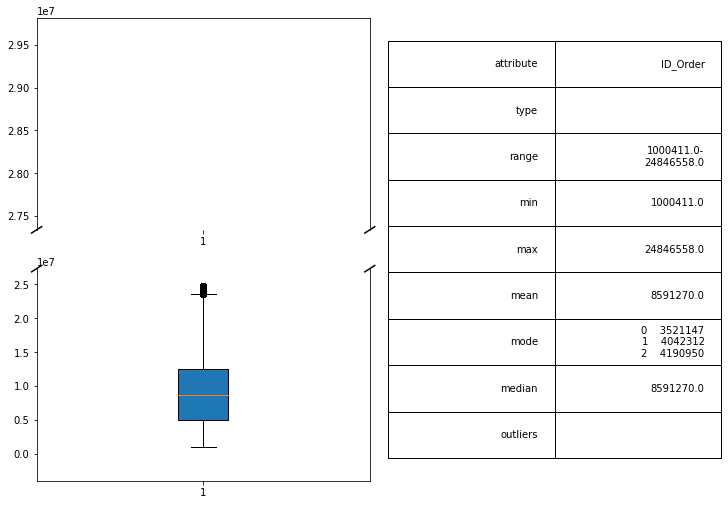

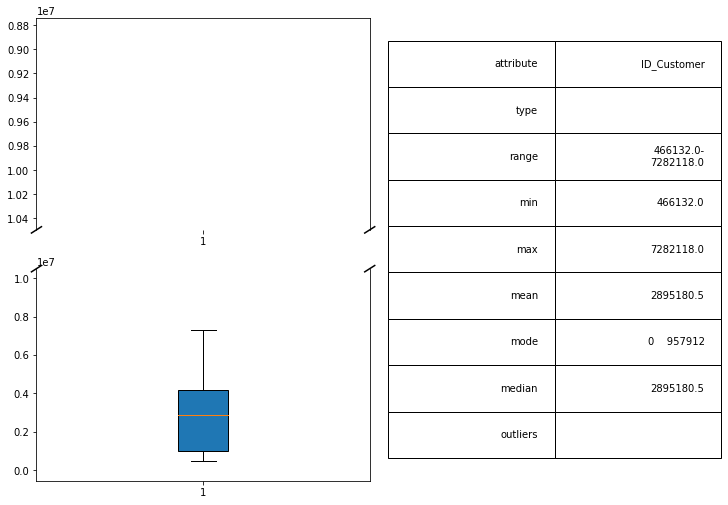

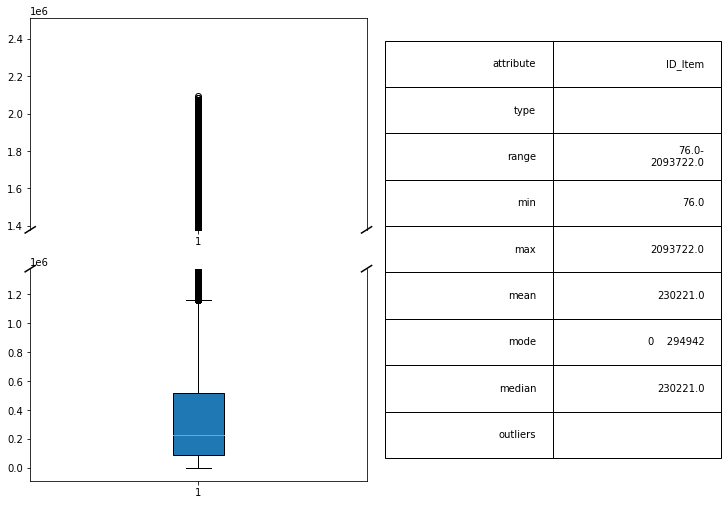

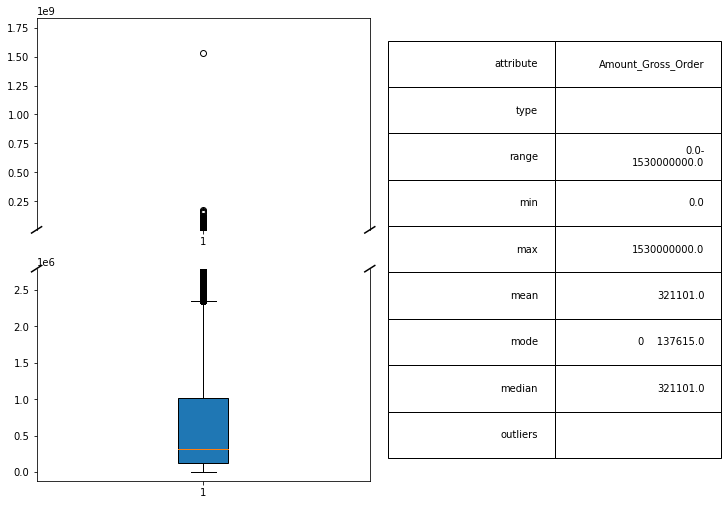

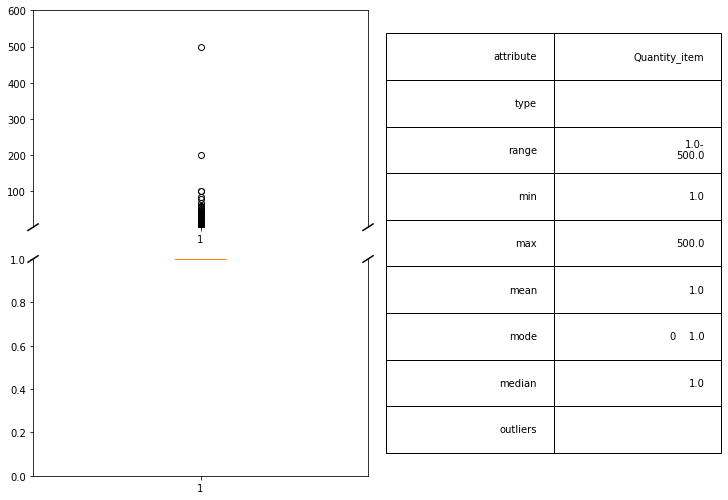

In [14]:
attributes = ['ID_Order','ID_Customer','ID_Item','Amount_Gross_Order','Quantity_item']
box_plot_table('orders',attributes)

In [15]:
data.remove_from_DFrames(['orders'])

In [16]:
data.load_into_DFrames({'comment':'xlsx'})
data.data_frames['comment'].head(3)

,product_id,confirmed_at,comment
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...


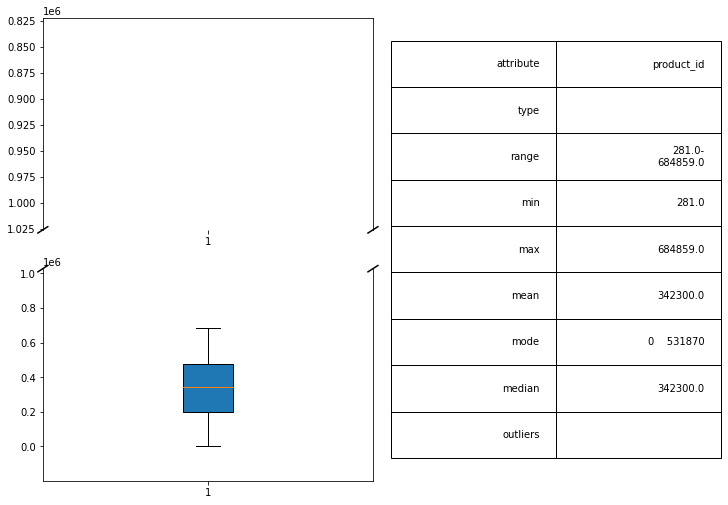

In [18]:
attributes = ['product_id']
box_plot_table('comment',attributes)

In [19]:
data.remove_from_DFrames(['comment'])

In [20]:
data.load_into_DFrames({'tarikhche kharid':'csv'})
data.data_frames['tarikhche kharid'].head(3)

,id,product_variant_id,selling_price,rrp_price,base_price,buy_price,order_limit,start_at,end_at,tags,show_in_price_history,active,created_at,product_id,marketplace_seller_id
0,18752043,1977385,850000,850000,\N,\N,1,\N,\N,\N,1,1,2018-11-26 18:59:52,667969,2962
1,18752022,1977380,12550000,12550000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:59:31,150144,78525
2,18752046,1977380,12500000,12500000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:59:55,150144,78525


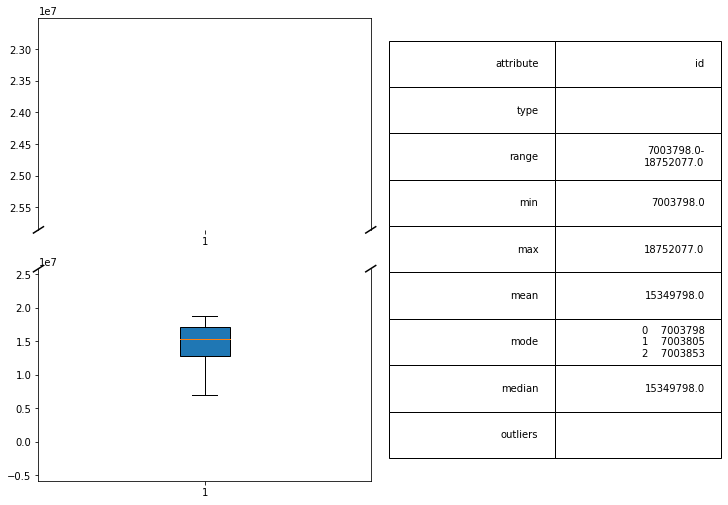

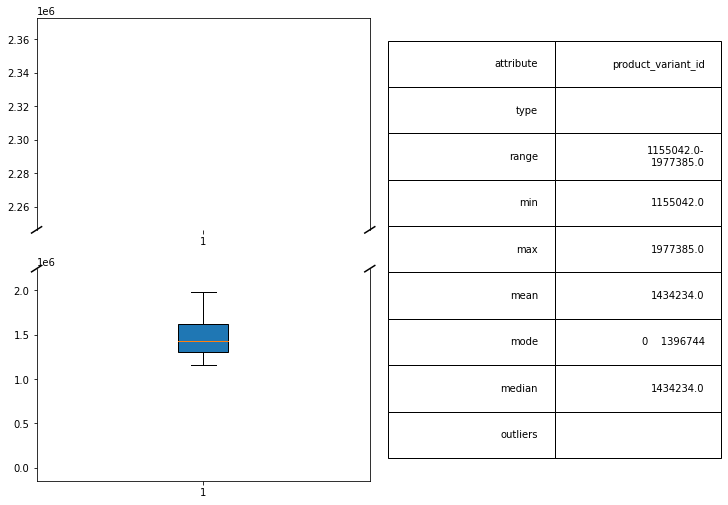

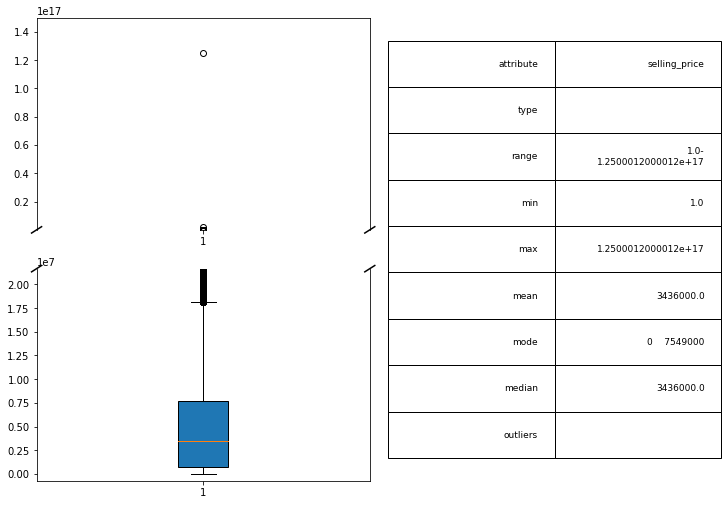

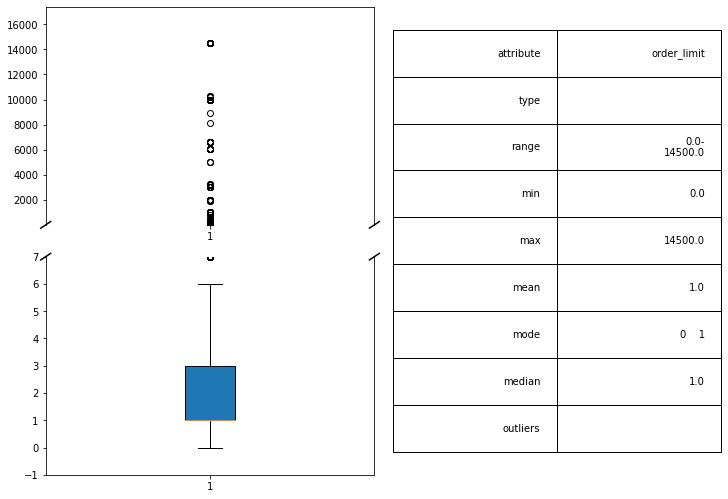

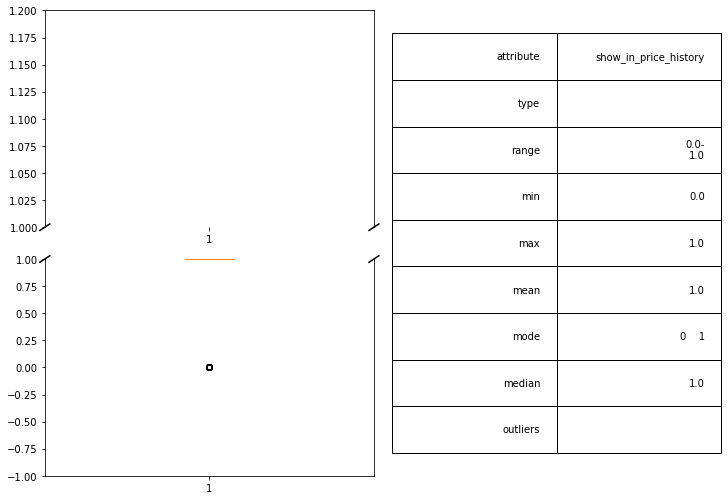

<ipython-input-2-150a6920eeb1>:55: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax1_down.set_ylim(min(0,min_value-q1),q3+(2*(q3-q1)))


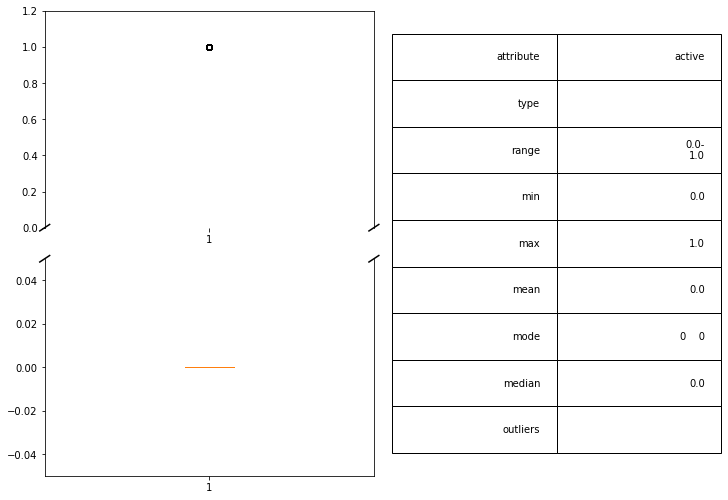

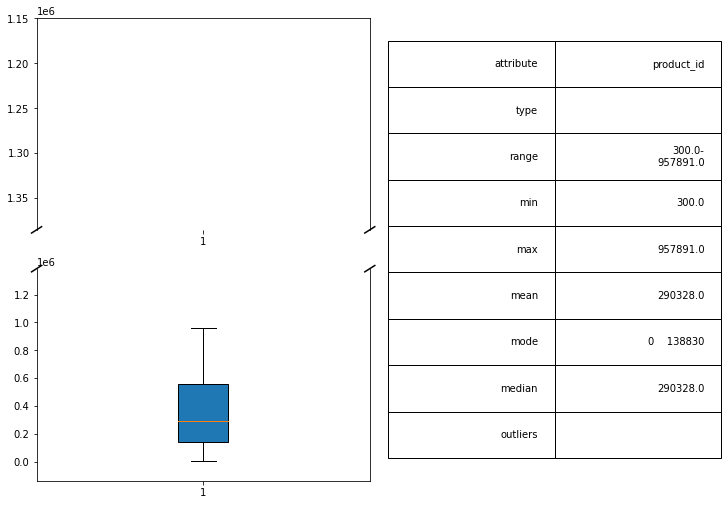

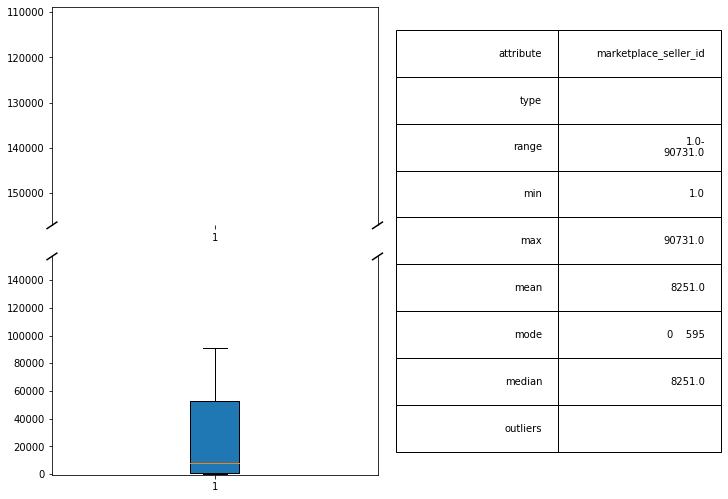

In [22]:
attributes = ['id','product_variant_id','selling_price','order_limit',
              'show_in_price_history','active','product_id','marketplace_seller_id']
box_plot_table('tarikhche kharid',attributes)

In [ ]:
data.remove_from_DFrames(['tarikhche kharid'])

In [23]:
data.load_into_DFrames({'keifiat':'xlsx'})
data.data_frames['keifiat'].head(3)

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN


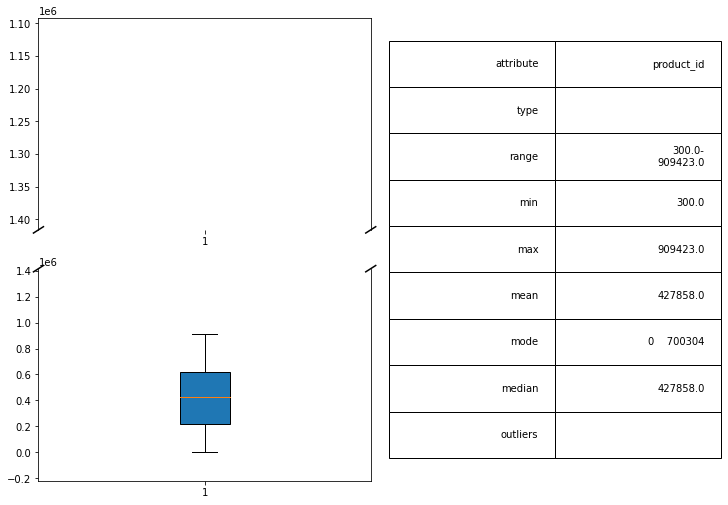

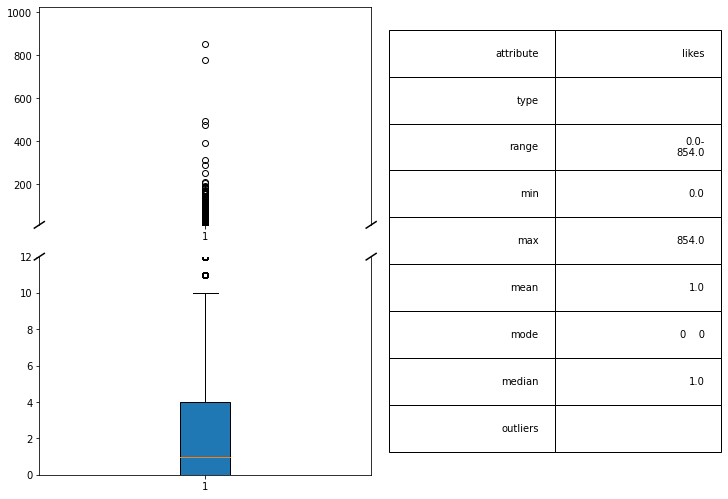

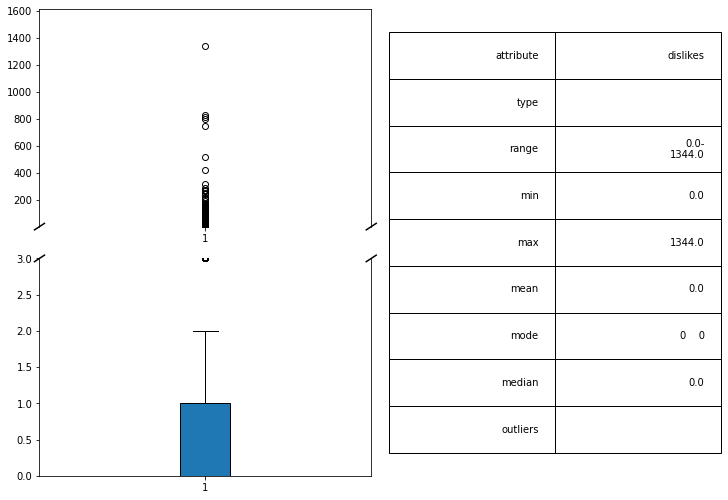

In [24]:
attributes = ['likes','dislikes',]
box_plot_table('keifiat',attributes)

In [ ]:
data.remove_from_DFrames(['keifiat'])